<a href="https://colab.research.google.com/github/259mit/ML/blob/LabAssignments/ML_LAB_7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_covtype, fetch_kddcup99, fetch_lfw_pairs, fetch_lfw_people, fetch_olivetti_faces
from sklearn.datasets import fetch_rcv1, load_breast_cancer, load_digits, load_wine

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [11]:
from keras import models
from keras import layers
import tensorflow as tf
from keras.utils import to_categorical

#Forest Cover

Loading Dataset and Preprocessing

In [18]:
forest = fetch_covtype()
x_fetch_covtype = forest.data
y_fetch_covtype = forest.target

In [19]:
x_forest = pd.DataFrame(x_fetch_covtype)
y_forest = pd.DataFrame(y_fetch_covtype)
print(x_forest.shape)
print(y_forest.shape)

(581012, 54)
(581012, 1)


Making a Neural Network

In [20]:
y_fore = y_forest.replace([1,2,3,4,5,6,7], [0,1,2,3,4,5,6])
y_fore = to_categorical(y_fore)
x_train, x_test, y_train, y_test = train_test_split(x_forest, y_fore, test_size = 0.2)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(464809, 54)
(58101, 54)
(58102, 54)
(464809, 7)
(58101, 7)
(58102, 7)


In [21]:
nn_forest = models.Sequential()
nn_forest.add(layers.Dense(512, activation = 'relu', input_shape = (54, )))
nn_forest.add(layers.Dense(256, activation = 'relu'))
nn_forest.add(layers.Dense(128, activation = 'relu'))
nn_forest.add(layers.Dense(54, activation = 'relu'))
nn_forest.add(layers.Dense(7, activation = 'softmax'))
nn_forest.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [22]:
forest_history = nn_forest.fit(x_train, y_train, epochs = 120, batch_size = 5000, validation_data = (x_dev, y_dev), callbacks=[callbacks])
for_dev_acc = nn_forest.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is',for_dev_acc)

Epoch 1/120
93/93 [==============================] - 1s 9ms/step - loss: 28.4830 - accuracy: 0.3956 - val_loss: 11.5370 - val_accuracy: 0.3700
Epoch 2/120
93/93 [==============================] - 1s 6ms/step - loss: 3.9404 - accuracy: 0.4095 - val_loss: 2.1587 - val_accuracy: 0.3907
Epoch 3/120
93/93 [==============================] - 1s 6ms/step - loss: 2.2334 - accuracy: 0.4238 - val_loss: 1.5448 - val_accuracy: 0.4881
Epoch 4/120
93/93 [==============================] - 1s 6ms/step - loss: 1.4112 - accuracy: 0.4508 - val_loss: 1.2339 - val_accuracy: 0.4870
Epoch 5/120
93/93 [==============================] - 1s 6ms/step - loss: 1.2857 - accuracy: 0.4679 - val_loss: 1.1825 - val_accuracy: 0.4908
Epoch 6/120
93/93 [==============================] - 1s 6ms/step - loss: 1.2080 - accuracy: 0.4970 - val_loss: 1.0111 - val_accuracy: 0.5333
Epoch 7/120
93/93 [==============================] - 1s 6ms/step - loss: 1.1127 - accuracy: 0.5158 - val_loss: 0.9815 - val_accuracy: 0.5449
Epoch 8/120

Plotting Accuracy & Validation Accuracy with Epoch

Plotting Loss & Validation Loss with Epoch

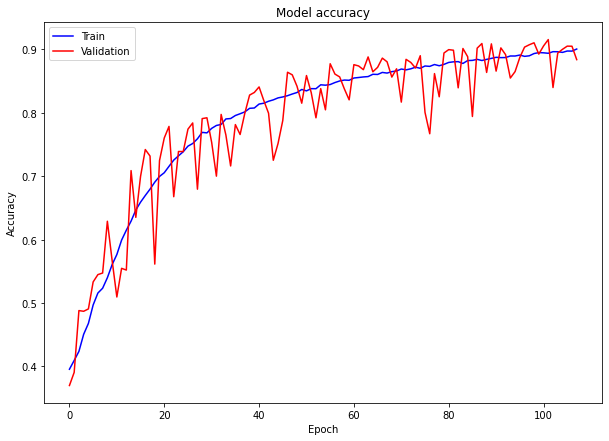

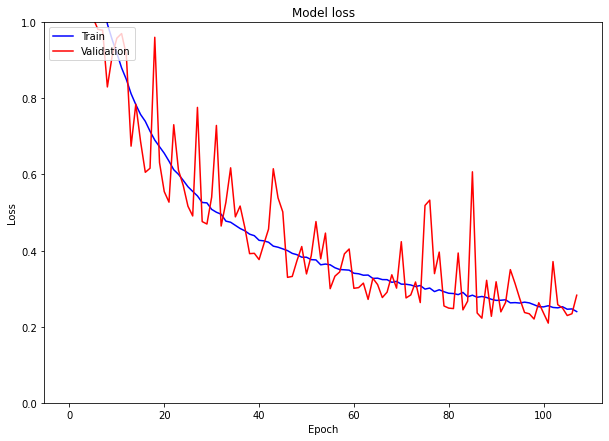

In [23]:
plt.figure(figsize = (10,7))
plt.plot(forest_history.history['accuracy'], color = 'blue')
plt.plot(forest_history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(forest_history.history['loss'], color = 'blue')
plt.plot(forest_history.history['val_loss'], color = 'red')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
for_test_acc = nn_forest.evaluate(x_test, y_test)[1]
print('The test accuracy is',for_test_acc)

1816/1816 [==============================] - 4s 2ms/step - loss: 0.2829 - accuracy: 0.8842
The test accuracy is 0.884238064289093
